# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)} = -\frac{\hbar^2}{2m} \biggl( \frac{e^{-\frac{(x-\mu )^2}{2 \sigma ^2}} \left((x-\mu )^2-\sigma ^2\right)}{\sigma ^4}+\frac{e^{-\frac{(\mu +x)^2}{2 \sigma ^2}} \left((\mu +x)^2-\sigma ^2\right)}{\sigma ^4}\biggr) / \Psi_T^{\sigma,\mu}(x) 
$$
In natural units and simplifying
$$
\frac{{-\frac{1}{2}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)} = -\frac{1}{2}\frac{\mu ^2-\sigma ^2+x^2-2 \mu  x \tanh \left(\frac{\mu  x}{\sigma ^2}\right)}{\sigma ^4}
$$

$$
\implies \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = -\frac{1}{2\sigma ^4} \left(\mu ^2-\sigma ^2+x^2-2 \mu  x \tanh \left(\frac{\mu  x}{\sigma ^2}\right)\right) + x^4 - \frac{5}{2}x^2
$$

Sampling of $|\Psi_T(x)|^2$ using Metropolis Algorithm. With parameter $\mu =1$, $\sigma=\frac{1}{2}$, $x_0=0$,$ \delta = 1$ with $N=10000$ samplings

(1.0, 5.744518075693506e-09)


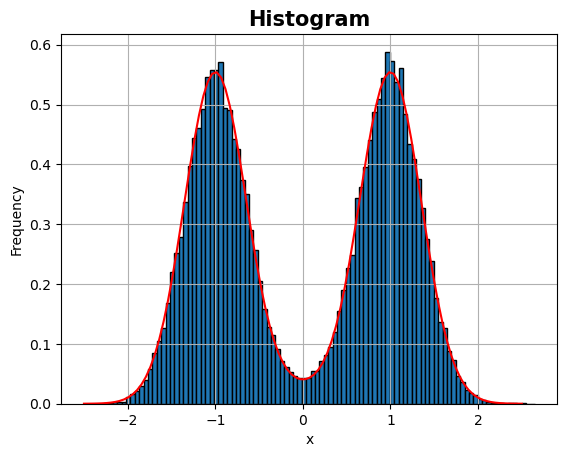

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# Read data from file using NumPy
data = np.loadtxt('DATA/test/wave.dat')

mu = 1
sigma= 0.5
def psi(x):
   return (np.exp((-(x-mu)**2)/(2*sigma**2)) + np.exp((-( x + mu)**2)/(2*sigma**2)))

#modulus squared norm calculated using mathematica 
norm = 2*(1+np.exp(-mu**2/sigma**2)) *np.sqrt(np.pi)*sigma 

def psi2(x):
   return psi(x)**2/norm

print(integrate.quad(psi2,-np.inf,np.inf))
x= np.linspace(-2.5,2.5,100)
# Plotting the histogram
plt.hist(data, bins=100,edgecolor='black',density= True)  # Adjust the number of bins as needed
plt.plot(x,psi2(x),color='red')
plt.title('Histogram', fontsize=15, fontweight='bold')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## How fast does Monte Carlo integral converge and with what error?

To use Simulated annealing, i need to estimate for every T the value of $\langle {\hat H} \rangle_T$ with its associated untertainty using data blocking, here i want to see how many Monte Carlo steps i need to evaluate the integral.

Use 100 blocks and nsteps = 100,1000,10000 with $\mu = 1$ and $\sigma = 0.5$

error with 100 steps = 0.0176752
error with 1000 steps = 0.00586617
error with 10000 steps = 0.0016348
error with 100000 steps = 0.00052524


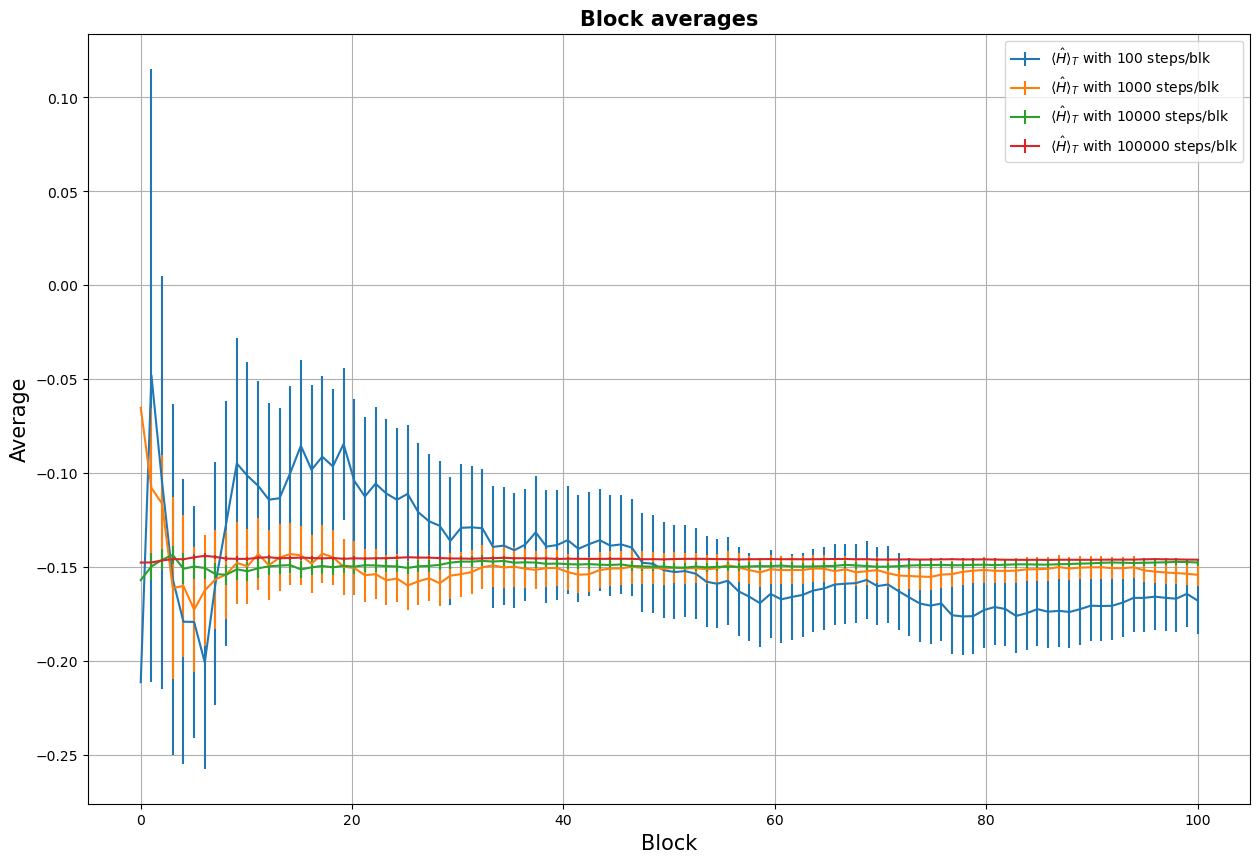

In [2]:
nsteps =[100,1000,10000,100000]
blk = np.linspace(0,100,100) #blk=[0,1,2,...,100]\
plt.figure(figsize=(15, 10)) # Set the size of the plot figsize=(width, height)
for n in nsteps:
    y,err = np.loadtxt('DATA/test/blk100steps'+str(n)+'.dat',usecols=(0,1),unpack=True)
    print(f'error with {n} steps = {err[-1]}')
    plt.errorbar(blk,y,yerr=err,label=r'$\langle {\hat H} \rangle_T$ with '+str(n)+" steps/blk")
plt.title('Block averages', fontsize=15, fontweight='bold')
plt.xlabel('Block', fontsize=15)
plt.ylabel('Average', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()



Since it's a Monte Carlo integral we expect, from the Central Limit Theorem, that the error of the single integral scale like $\frac{\sigma_I}{\sqrt{N}}$ where N is the number of points per integral and Data Blocking also scale $\propto \frac{1}{\sqrt{blk}}$, so we expect an error proportional to $\frac{\sigma_I}{\sqrt{N * blk}}$. 

- error with 100 steps = 0.0176752
- error with 1000 steps = 0.00586617
- error with 10000 steps = 0.0016348
- error with 100000 steps = 0.00052524

Observe that $\frac{0.0176752}{\sqrt{10}}\approx 0.00558910$, and there is a factor of 10 reduction in error as we move from 100 steps to 10k steps, and similarly between 1k steps and 100k steps. This confirms our expectation.

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

We have 2 Metropolis: one to sample the modulus squared and the other to find
 $\mu$ and $\sigma$

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

### Cooling Schedule
The cooling schedule is the procedure that decreases the temperature parameter. Bringing the temperature parameter from a large value to
zero too quickly has some dramatic consequences on the quality of the solution. Lowering the temperature too slowly may result in a large computation time. The speed of convergence towards the global minimum and the quality of the solution depend on the cooling schedule.

1.    `Geometric Cooling`:
    $T_k=T_0\cdot\alpha^k$
    where $T_0$ is the initial temperature, $\alpha$ is a constant factor between close to 1 (i chose $0.9999$) that controls the rate of cooling, and $k$ is the current iteration number.
2.  `Hyperbolic Cooling`:
   $T_k=\frac{T_0} {1+\alpha\cdot k}$​​
    where $T_0$ is the initial temperature, $\alpha$ is a constant factor (small, i chose $10^{-4}$), and $k$ is the current iteration number

3.    `Logarithmic Cooling`: $T_k=\frac{T_0}{\log⁡(\alpha k+e)}$​​
    where $T_0$​ is the initial temperature,$\alpha$ is a constant factor (small, i chose $5\cdot 10^{-4}$) and $k$ is the current iteration number.

4.  `Linear Cooling`:
    $T_k=T_0−\beta\cdot k$
    where $T_0$ is the initial temperature, $\beta$ is a constant factor that controls the rate of cooling (i chose $10^{-6}$), and $k$ is the current iteration number.


`input.dat` file 
```C++
100         blk (number of blocks)
100000      N (number of Monte Carlo steps in 100 blocks)
3           delta (step for Metropolis)
1           x0 (initial position)

0.8         mu (initial value of mu)
0.6         sigma (initial value of sigma)

1           T (temperature)

1           delta_mu (step for mu)
1           delta_sigma (step for sigma)
0.0001      mu_err
0.0001      sigma_err
```
delta_mu, delta_sigma are the Metropolis step for mu and sigma, in my code they are not constant but scales with the
temperature T, they decrease as T decreases.

mu_err and sigma_err are needed as stopping criteria for the Simulated Annealing.
The Simulated Annealing stops when 2*delta_mu/T < mu_err or 2*delta_sigma/T < sigma_err. This reflects the fact
that if the Metropolis step is too small compared to the error, the algorithm will never converge, and so it stops, a better way to do this would be to first estimate the statistical uncertainty with a trial calculation of the integral and then use that value of a reference.

So the last values of mu and sigma are not the one that minimize the energy, but because the Metropolis step is too small.
My algorithm gives the minimun value of the cost function H found in all the iterations before stopping because in every step it checks if the new value is lesser or not than the current minimum value.

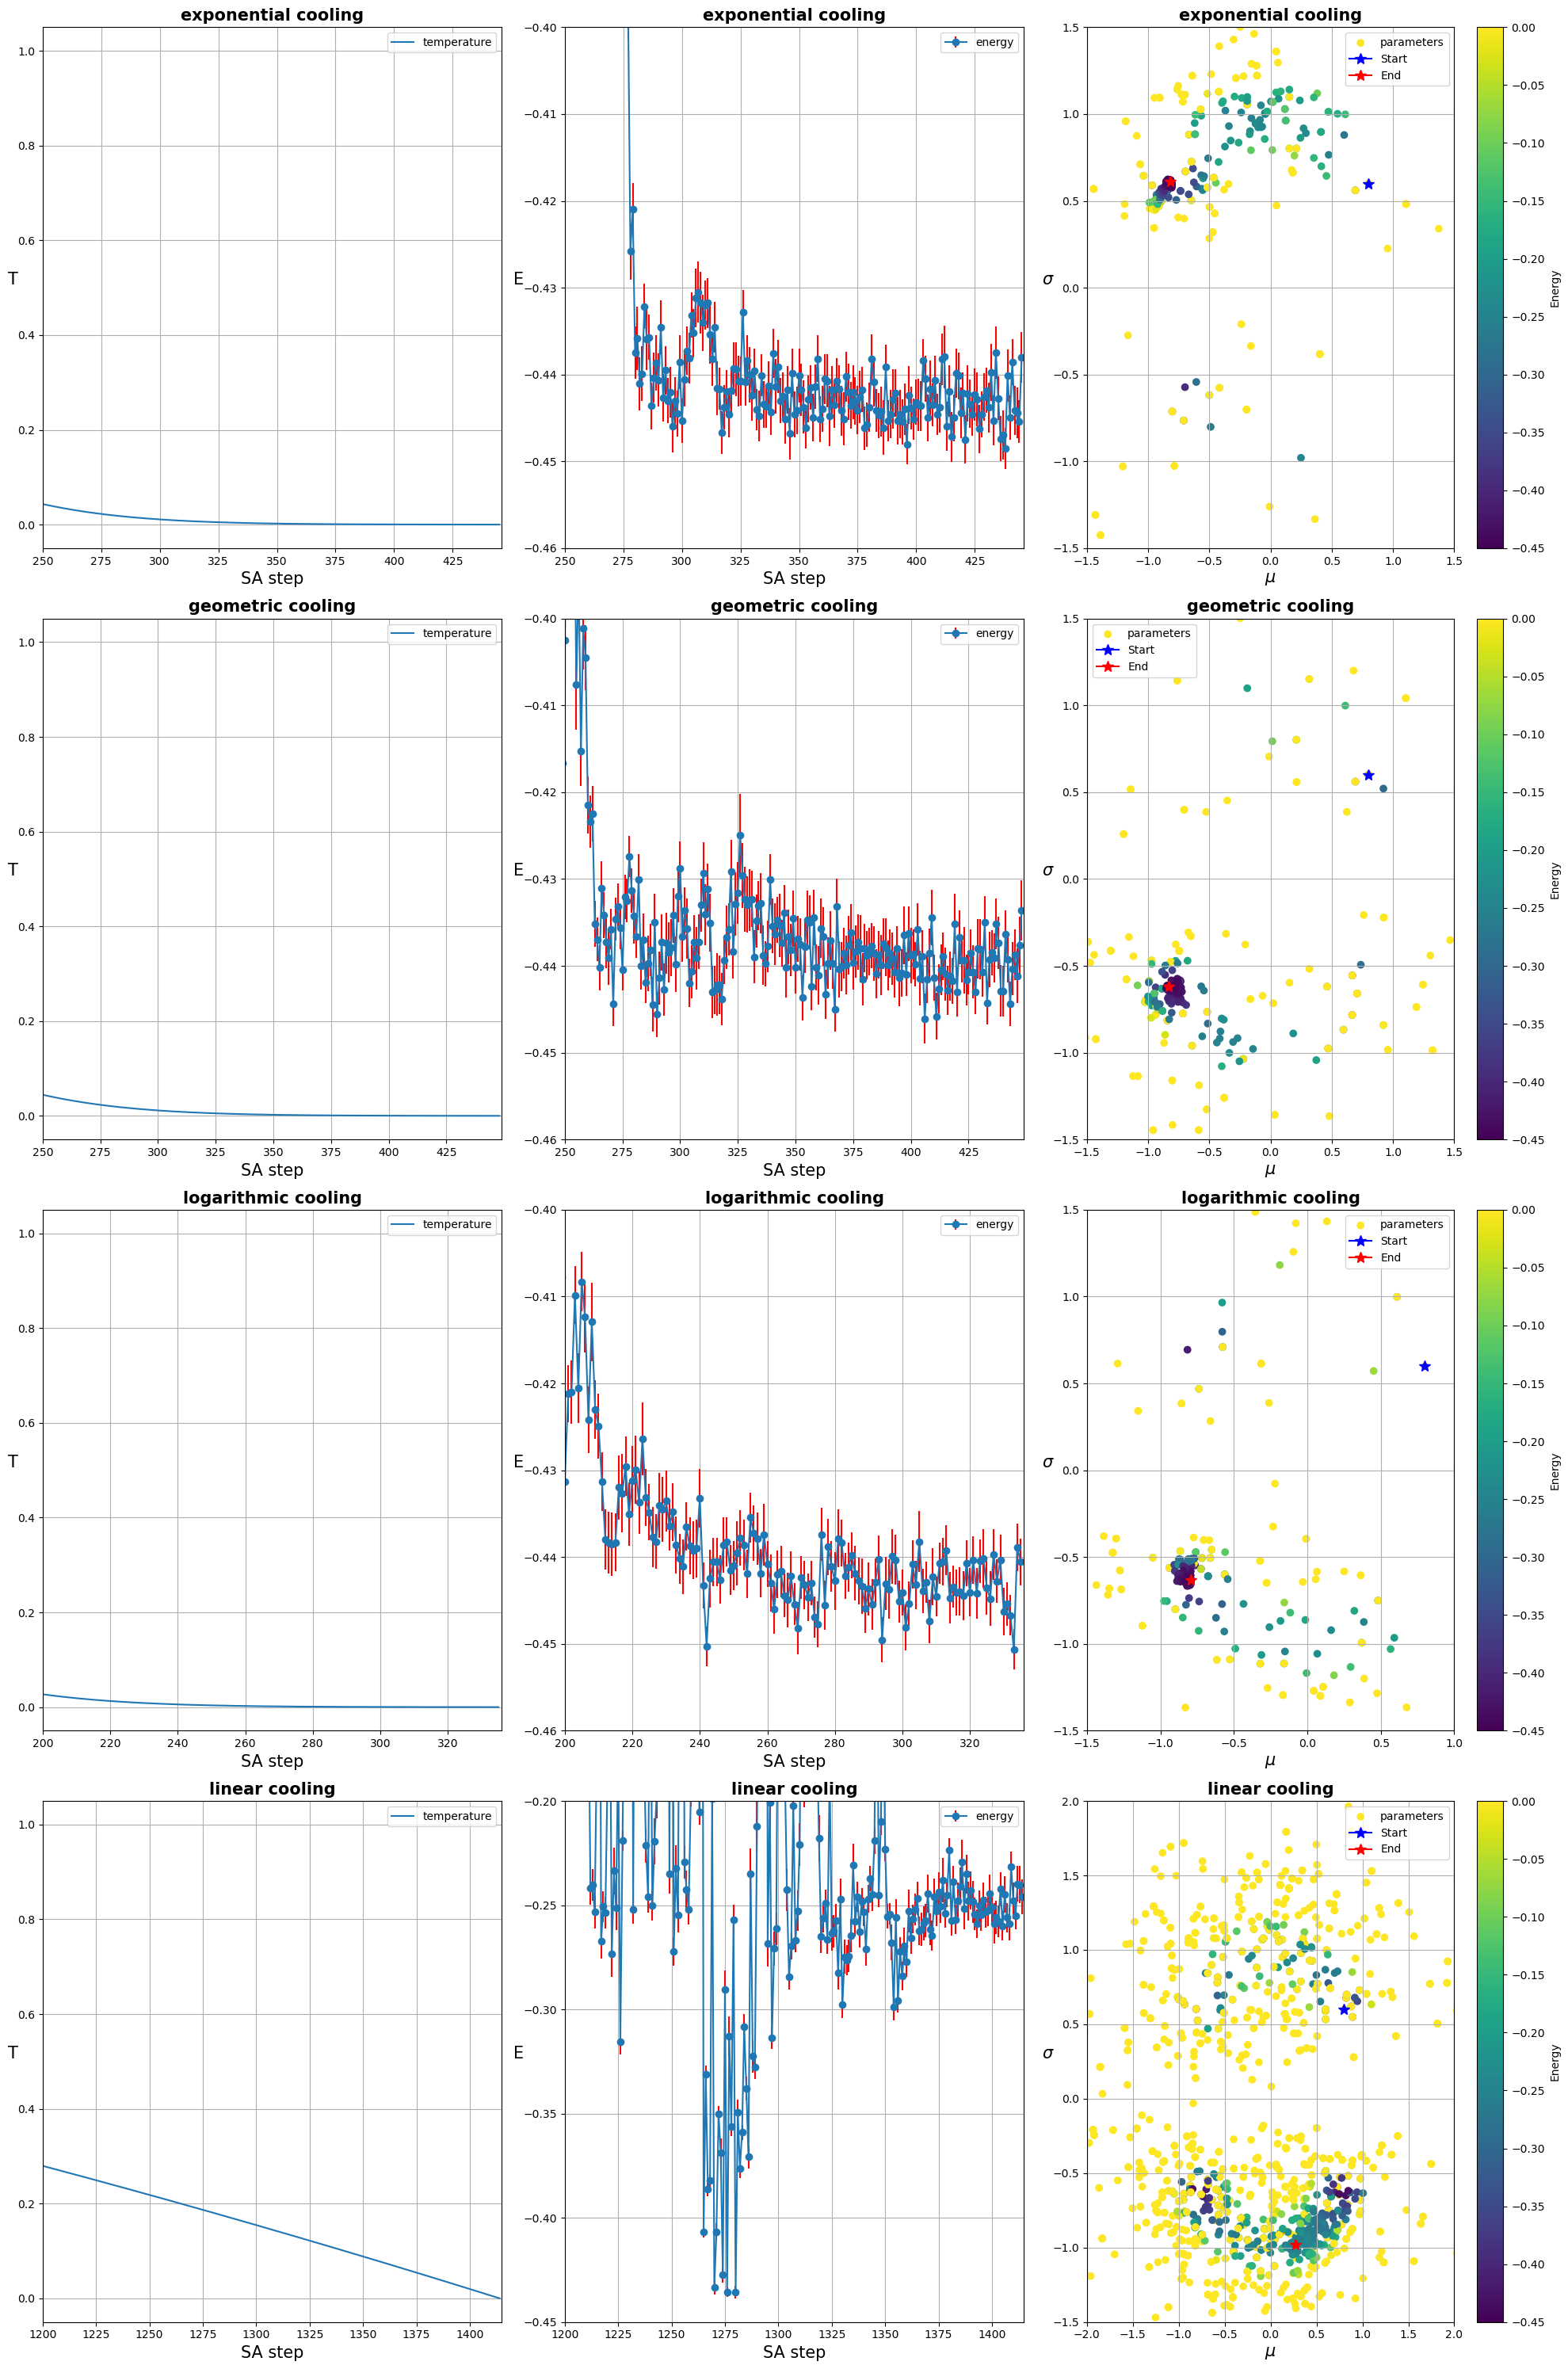

In [3]:
cooling_schedule = ['exponential','geometric','logarithmic','linear',]

# Create a figure and subplots
fig, axs = plt.subplots(4, 3, figsize=(20, 30))  # 4 rows, 2 columns figsize=(width, height)

for i,schedule in enumerate(cooling_schedule): #i = 0,1,2,3 and schedule = 'exponential','geometric','logarithmic','linear'
    # Load data from file
    x,T = np.loadtxt('DATA/SA/'+schedule+'/temperature.dat',usecols=(0,1),unpack=True)
    E,err= np.loadtxt('DATA/SA/'+schedule+'/energy.dat',usecols=(1,2),unpack=True)
    mu,sigma = np.loadtxt('DATA/SA/'+schedule+'/parameters.dat',usecols=(0,1),unpack=True)
    
    # Plot data for temperature
    axs[i,0].plot(x,T,label='temperature')
    # Plot data and error for energy
    axs[i,1].errorbar(x,E,err,label='energy',fmt='o-',ecolor='red')
    # Scatterplot for trajectory in the parameter space
    sc = axs[i,2].scatter(mu,sigma,c=E,cmap='viridis',label='parameters',vmin= -0.45,vmax=0)
    # Add start and end points of the trajectory
    axs[i,2].plot(mu[0], sigma[0], marker='*', color='blue', markersize=10, label='Start')
    axs[i,2].plot(mu[-1], sigma[-1], marker='*', color='red', markersize=10, label='End')
    # Add a colorbar
    cbar = fig.colorbar(sc, ax=axs[i,2], label='Energy')
    if i == 0 or i == 1: # exponential and geometric cooling
        axs[i,1].set_ylim(-0.46,-0.4)
        axs[i,0].set_xlim(250,len(x))
        axs[i,1].set_xlim(250,len(x))
        axs[i,2].set_xlim(-1,1)
        axs[i,2].set_ylim(-1.5,1.5)
        axs[i,2].set_xlim(-1.5,1.5)
        
    if i == 2:# logarithmic cooling
        axs[i,1].set_ylim(-0.46,-0.4)
        axs[i,0].set_xlim(200,len(x))
        axs[i,1].set_xlim(200,len(x))
        axs[i,2].set_ylim(-1.5,1.5)
        axs[i,2].set_xlim(-1.5,1)
    if i == 3:# linear cooling
        axs[i,1].set_ylim(-0.45,-0.2)
        axs[i,0].set_xlim(1200,len(x))
        axs[i,1].set_xlim(1200,len(x))
        axs[i,2].set_ylim(-1.5,2)
        axs[i,2].set_xlim(-2,2)
    
     # Set labels and titles
    axs[i,0].set_xlabel('SA step',fontsize=15)
    axs[i,0].set_ylabel('T',fontsize=15,rotation= 'horizontal')
    axs[i,1].set_xlabel('SA step',fontsize=15)
    axs[i,1].set_ylabel('E',fontsize=15,rotation= 'horizontal')
    axs[i,2].set_xlabel(r'$\mu$',fontsize=15)
    axs[i,2].set_ylabel(r'$\sigma$',fontsize=15,rotation= 'horizontal')
    for j in range(3):
        axs[i,j].set_title(schedule+' cooling',fontsize=15, fontweight='bold')
        axs[i,j].legend()
        axs[i,j].grid(True)
plt.tight_layout()
plt.show()

I don't see much difference in the result for the 4 different cooling schedules, after choosing appropriate cooling parameter $\alpha$ they all converge, linear cooling is the worst, not only it reaches negative temperature after some iterations but it also converges extremely slowly, but in this way it explored more the space of parameters.

After the main simulated annealing process, the code performs additional sampling and data blocking to refine the estimates of $\mu$ and $\sigma$, and to sample the wave function. The results are written to the respective files.. These are the final result: 

For the exponential cooling schedule:
Minimum found: H = -0.448529 with (mu,sigma) = (-0.819502 , 0.610763)
Moving around the minimum, found: (mu,sigma) = (-0.801444 , 0.621512)
```C++
,=======================================,
|  H:          -0.443042 +/- 0.000943073|
'======================================='
```
For the geometric cooling schedule:
Minimum found: H = -0.446088 with (mu,sigma) = (-0.835194 , -0.618782)
Moving around the minimum, found: (mu,sigma) = (-0.779125 , -0.622315)
```C++
,=======================================,
|  H:          -0.44095 +/- 0.000855597 |
'======================================='
```

for the Logarithmic cooling: 
Minimum found: H = -0.450632 with (mu,sigma) = (-0.794049 , -0.6315)
Moving around the minimum, found: (mu,sigma) =
```C++
,=======================================,
|  H:          -0.442607 +/- 0.000797405|
'======================================='
```

for the linear cooling: 
Minimum found: H = -0.446988 with (mu,sigma) = (-0.810891 , 0.602656)
Moving around the minimum, found: (mu,sigma) = (-0.781873 , 0.6238)
```C++
,=======================================,
|  H:          -0.444074 +/- 0.000841148|
'======================================='
```

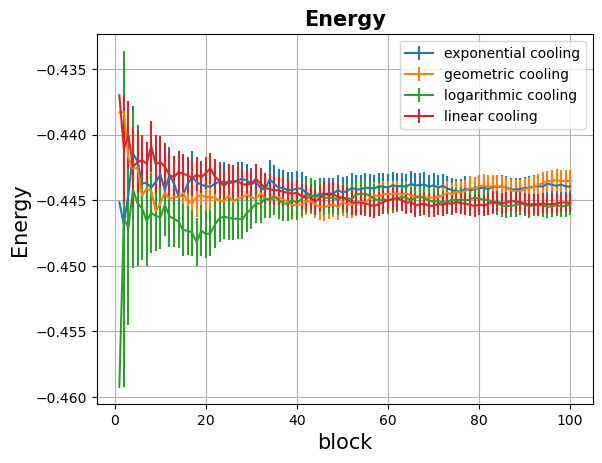

In [4]:
# plotting energy with the minumum energy found

cooling_schedule = ['exponential','geometric','logarithmic','linear',]

for i,schedule in enumerate(cooling_schedule): #i = 0,1,2,3 and schedule = 'exponential','geometric','logarithmic','linear'
    # Load data from file
    x,E,err= np.loadtxt('DATA/Minimum/'+schedule+'/energy.dat',usecols=(0,1,2),unpack=True)
    # mu,sigma = np.loadtxt('DATA/Minimum/'+schedule+'/parameters.dat',usecols=(0,1),unpack=True)
    plt.errorbar(x,E,err,label=schedule+' cooling')

plt.title('Energy', fontsize=15, fontweight='bold')
plt.xlabel('block', fontsize=15)
plt.ylabel('Energy', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

### Estimate of the Error for the parameters mu and sigma

After reaching a point around the minimum, i kept running the Simulated Annealing $10000$ times at fixed temperature $T=0.01$, i made it so that my Metropolis step L is uniform and dependent on the temperature $T$ $(L \in[-T,T])$, i observe that the value of mu and sigma oscillates around some value which i assume are the parameters that minimize the cost function and fit the distribution of those values with a Gaussian distribution.

I chose T = 0.01 because the acceptance function is $e^{-\frac{\Delta H}{T} }$ and using 100 Blk and 1000 points per blk to estimate $\langle {\hat H} \rangle_T$ i get an error of around $0.005$

Exponential Cooling -$\mu$: Expected Value (mean) = -0.79, Standard Deviation = 0.04
Exponential Cooling -$\sigma$: Expected Value (mean) = 0.63, Standard Deviation = 0.03
Geometric Cooling -$\mu$: Expected Value (mean) = -0.80, Standard Deviation = 0.04
Geometric Cooling -$\sigma$: Expected Value (mean) = 0.62, Standard Deviation = 0.03
Logarithmic Cooling -$\mu$: Expected Value (mean) = -0.81, Standard Deviation = 0.04
Logarithmic Cooling -$\sigma$: Expected Value (mean) = 0.63, Standard Deviation = 0.03
Linear Cooling -$\mu$: Expected Value (mean) = -0.79, Standard Deviation = 0.04
Linear Cooling -$\sigma$: Expected Value (mean) = 0.62, Standard Deviation = 0.03


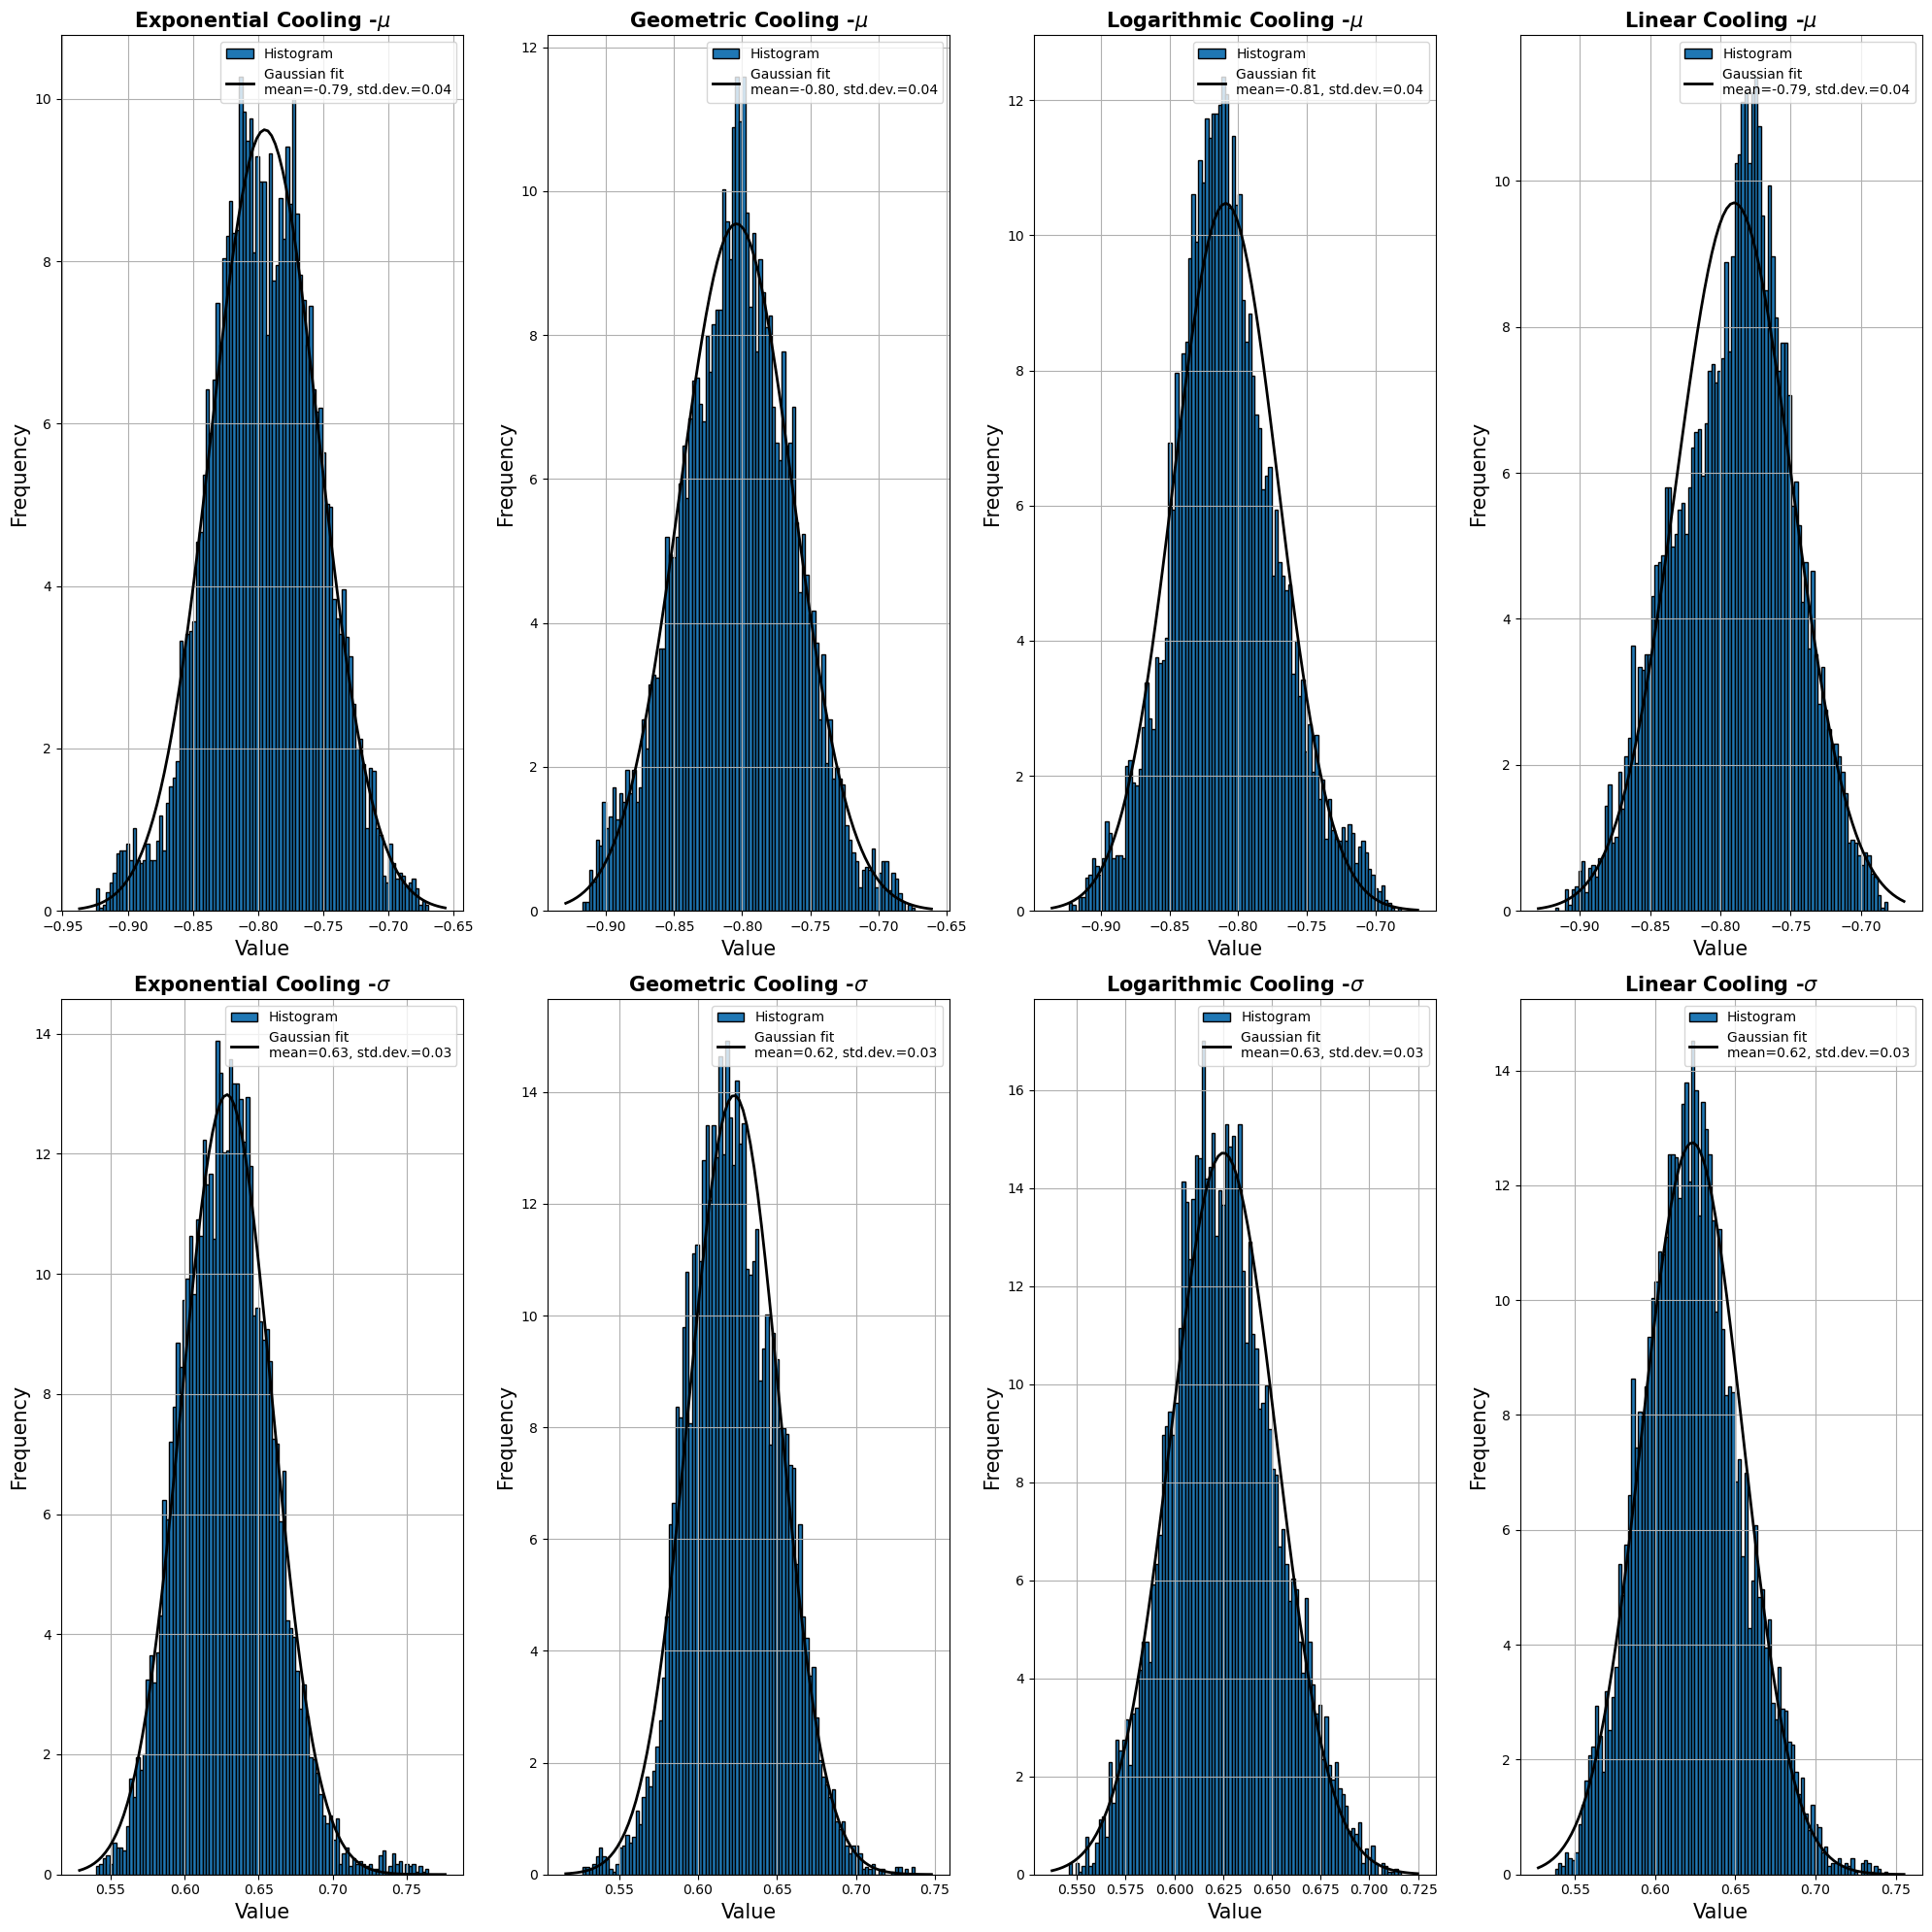

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

cooling_schedule = ['exponential', 'geometric', 'logarithmic', 'linear']

fig, axs = plt.subplots(2, 4, figsize=(20, 20))  # 2 rows, 4 columns figsize=(width, height)

for i, schedule in enumerate(cooling_schedule):  # i = 0, 1, 2, 3 and schedule = 'exponential', 'geometric', 'logarithmic', 'linear'
    # Load data from file
    mu_hist, sigma_hist = np.loadtxt('DATA/Minimum/' + schedule + '/parameters.dat', usecols=(1, 2), unpack=True)
    
    # Fit Gaussian to mu_hist
    mu_mean, mu_std = norm.fit(mu_hist)
    # Plot histogram and Gaussian fit for mu
    axs[0, i].hist(mu_hist, bins=100, edgecolor='black', density=True, label='Histogram')
    xmin, xmax = axs[0, i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu_mean, mu_std)
    axs[0, i].plot(x, p, 'k', linewidth=2, label=f'Gaussian fit\nmean={mu_mean:.2f}, std.dev.={mu_std:.2f}')
    axs[0, i].set_title(f'{schedule.capitalize()} Cooling -'+ r'$\mu$', fontsize=15, fontweight='bold')
    axs[0, i].set_xlabel('Value', fontsize=15)
    axs[0, i].set_ylabel('Frequency', fontsize=15)
    axs[0, i].legend()
    axs[0, i].grid(True)
    
    # Print values for mu
    print(f'{schedule.capitalize()} Cooling -'+ r'$\mu$'+f': Expected Value (mean) = {mu_mean:.2f}, Standard Deviation = {mu_std:.2f}')
    
    # Fit Gaussian to sigma_hist
    sigma_mean, sigma_std = norm.fit(abs(sigma_hist))
    # Plot histogram and Gaussian fit for sigma
    axs[1, i].hist(abs(sigma_hist), bins=100, edgecolor='black', density=True, label='Histogram')
    xmin, xmax = axs[1, i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, sigma_mean, sigma_std)
    axs[1, i].plot(x, p, 'k', linewidth=2, label=f'Gaussian fit\nmean={sigma_mean:.2f}, std.dev.={sigma_std:.2f}')
    axs[1, i].set_title(f'{schedule.capitalize()} Cooling -'+r'$\sigma$', fontsize=15, fontweight='bold')
    axs[1, i].set_xlabel('Value', fontsize=15)
    axs[1, i].set_ylabel('Frequency', fontsize=15)
    axs[1, i].legend()
    axs[1, i].grid(True)
    
    # Print values for sigma
    print(f'{schedule.capitalize()} Cooling -'+ r"$\sigma$" +f': Expected Value (mean) = {sigma_mean:.2f}, Standard Deviation = {sigma_std:.2f}')

plt.tight_layout()
plt.show()


So from these histogram i can get my best estimate of the parameters $\sigma$ and $\mu$:

$$\begin{cases}
    \mu = 0.80 \pm 0.04\\
    \sigma = 0.63 \pm 0.03
\end{cases}
$$

### <span style="color:green">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

Ground state energy:  -0.46046587969271563
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.971733134393021


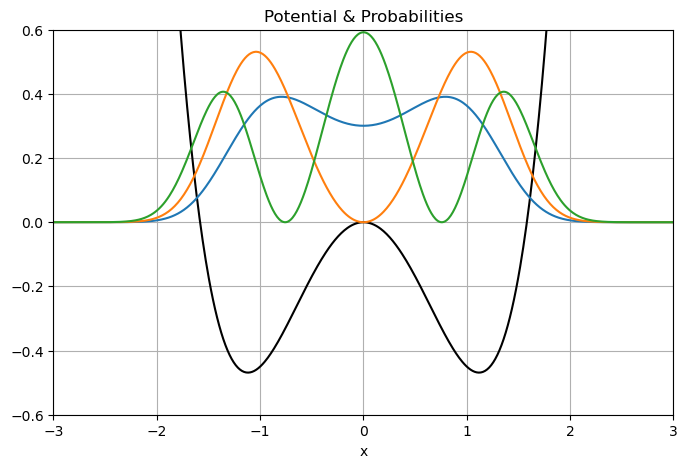

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

###  wave function

Sampled with N=1 milion steps

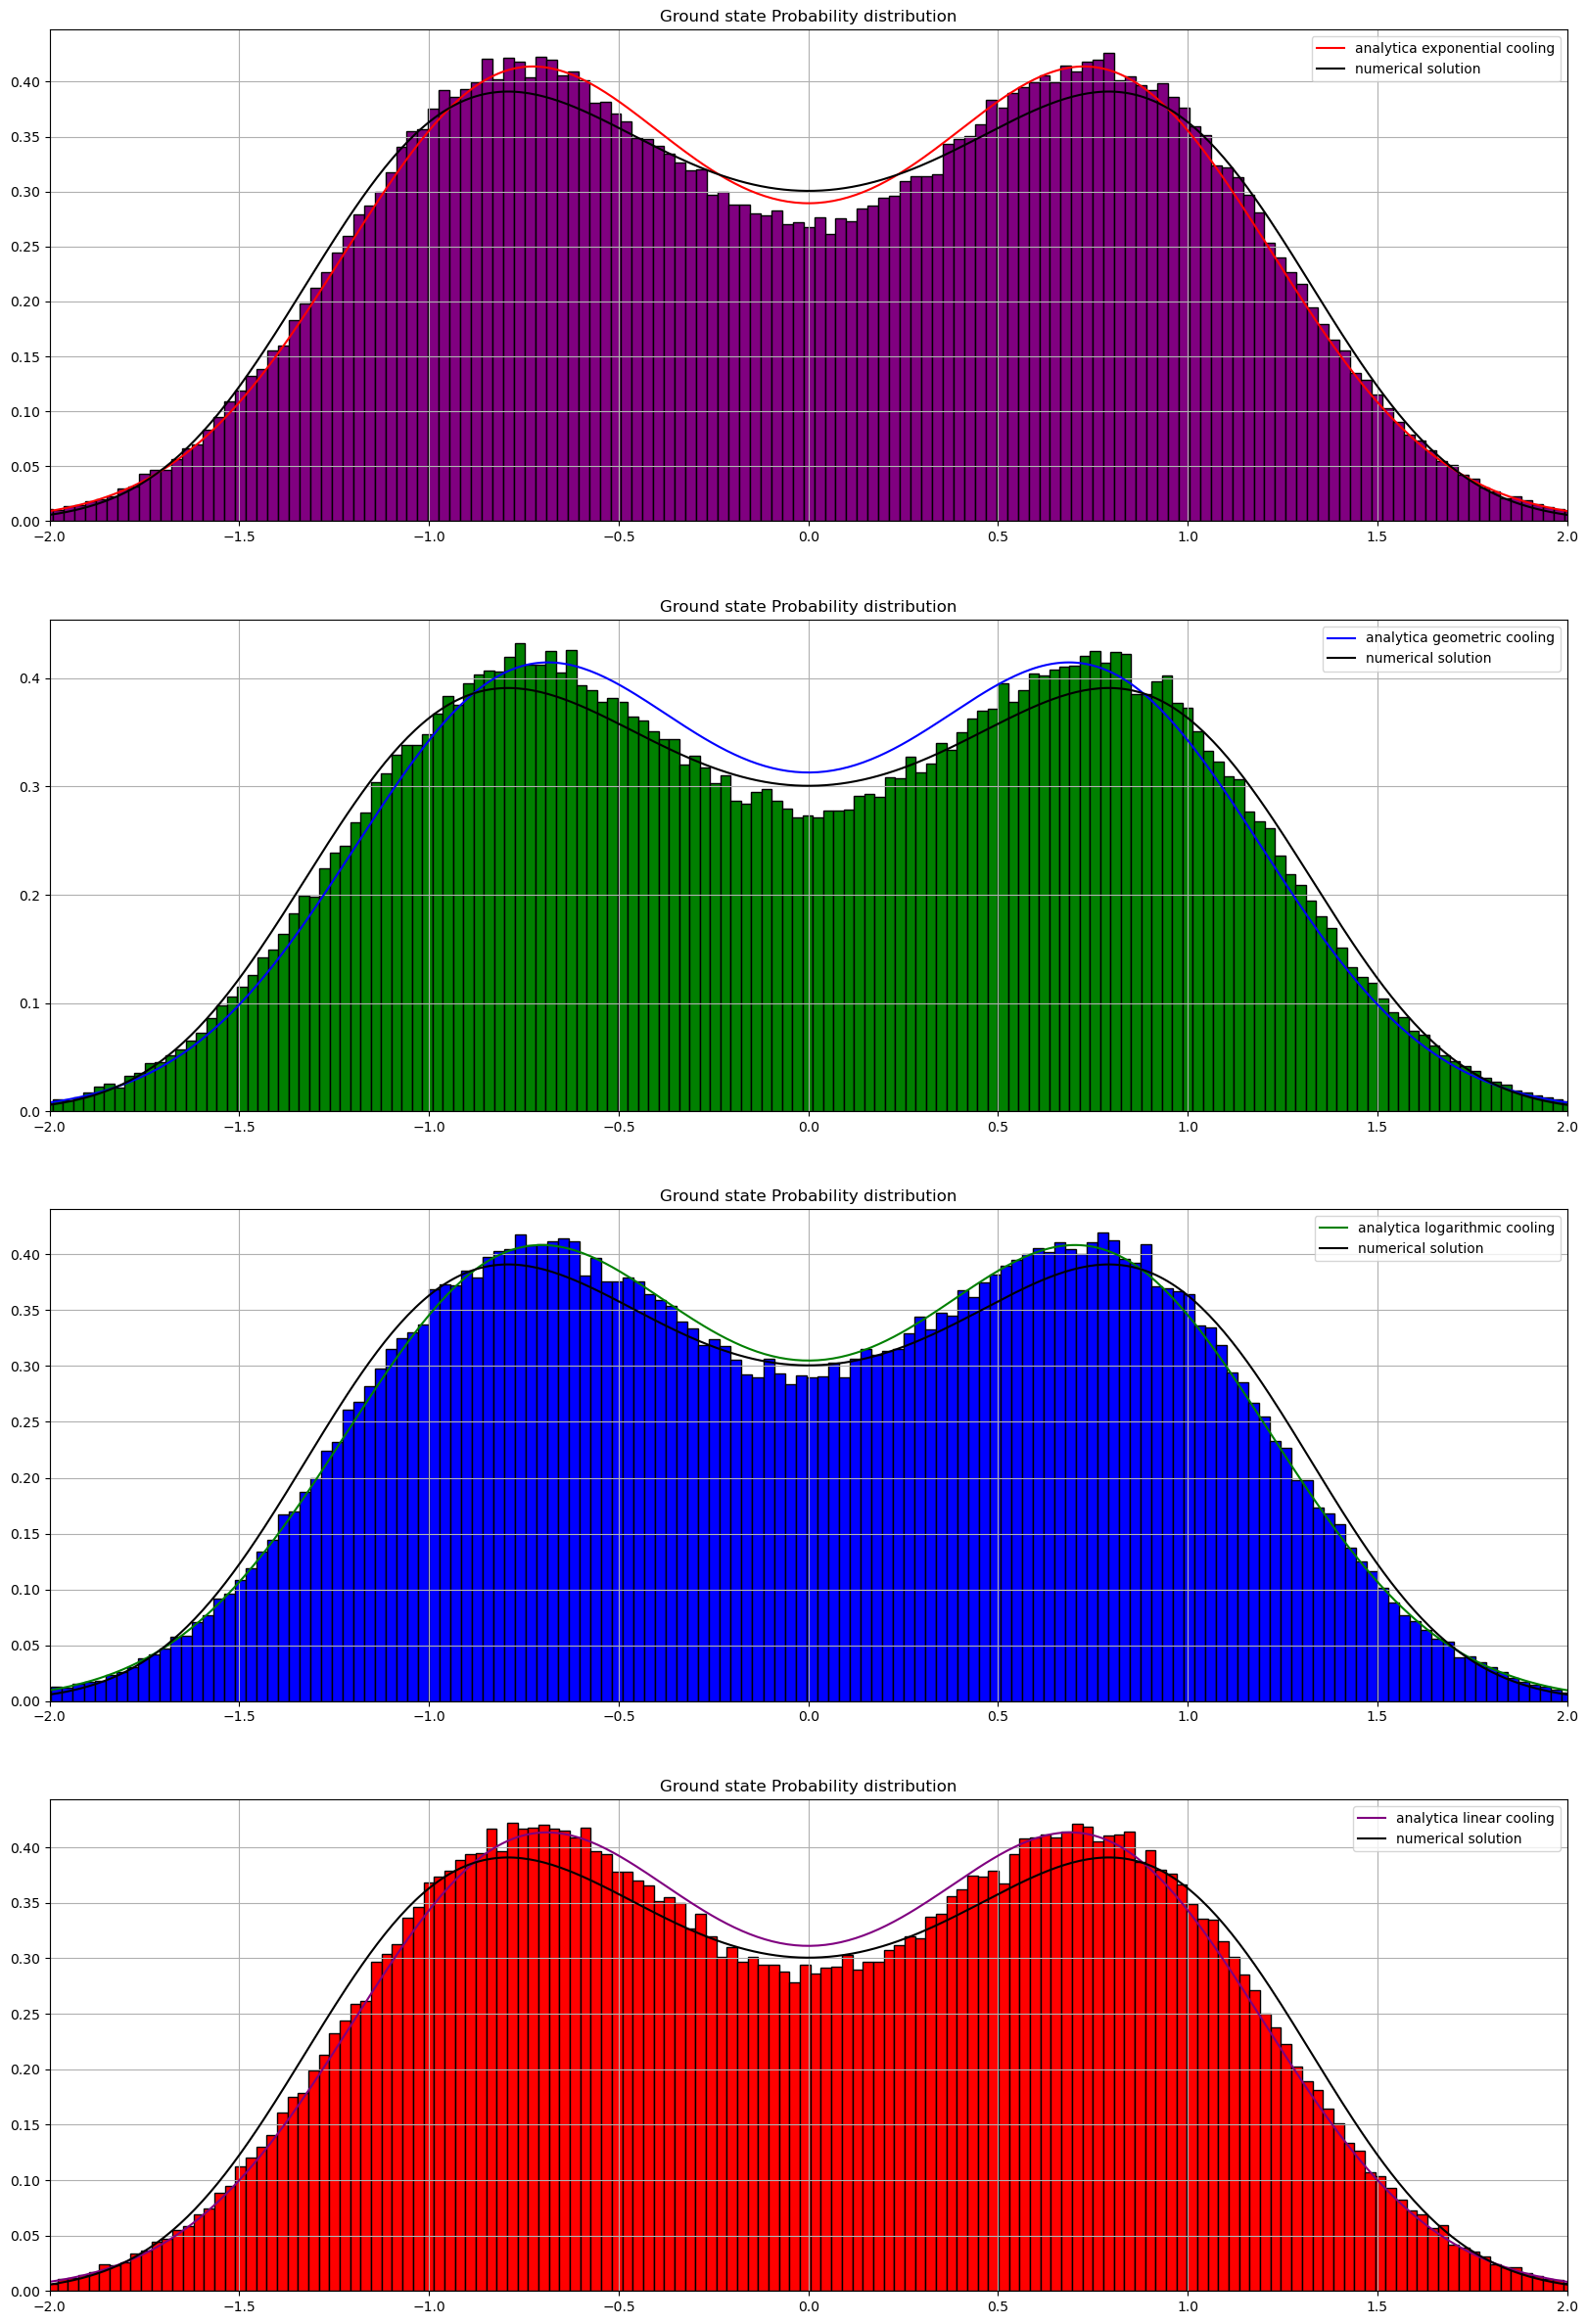

In [7]:
#wave function
def wave(x):
   return (np.exp((-(x-mu)**2)/(2*sigma**2)) + np.exp((-( x + mu)**2)/(2*sigma**2)))

#modulus squared norm calculated using mathematica 
def norm(mu,sigma):
    return 2*(1+np.exp(-mu**2/sigma**2)) *np.sqrt(np.pi)*abs(sigma)

def wave2(x,mu,sigma):
   return wave(x)**2/norm(mu,sigma)

fig,axs = plt.subplots(4,1,figsize=(20,30)) # 4 rows, 1 columns figsize=(width, height)

cooling = ['exponential','geometric','logarithmic','linear']
color = ['red','blue','green','purple']
mus = [-0.801444,-0.779125 ,-0.794049,-0.781873]
sigmas = [0.621512,-0.622315,-0.6315,0.6238]
x = np.linspace(-5,5,1000)

for i,cooling in enumerate(cooling_schedule):
   data = np.loadtxt('DATA/Minimum/'+cooling+'/wave.dat',usecols=(0),unpack=True)
   axs[i].hist(data, bins=200,edgecolor='black',density= True,color = color[3-i])  # Adjust the number of bins as needed
   mu = mus[i]
   sigma = sigmas[i]
   axs[i].plot(x,wave2(x,mu,sigma),color=color[i],label='analytica '+cooling+' cooling')
   axs[i].plot(x,(psi[0])**2,color='black',label='numerical solution')
   axs[i].grid(True)
   axs[i].xaxis.set_label('x')
   axs[i].yaxis.set_label('Probability')
   axs[i].set_xlim(-2,2)
   axs[i].set_title('Ground state Probability distribution')
   axs[i].legend()
   
plt.show()